# 1.0 Importação de bibliotecas

In [184]:
import pandas as pd
import numpy as np

import seaborn as sns

from datetime import datetime

# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [185]:
dicionario_mes = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}

In [186]:
df = pd.DataFrame()

for i in dicionario_mes.keys():
    arquivo = dicionario_mes[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

In [187]:
df.head()

,title,media,date,desc
0,A construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,01/01/2021,Dentre os principais pontos do plano estratégi...
1,"Refinaria Abreu e Lima da Petrobras, a RNEST p...",CPG Click Petroleo e Gas,01/01/2021,Petrobras informou em fato relevante na última...
2,5 Dicas de Tony Robbins para Ficar Rico Invest...,The Capital Advisor,01/01/2021,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,Acadêmicos de engenharia Mecânica criam projet...,CPG Click Petroleo e Gas,01/01/2021,Petrobras cancela a venda da fábrica de fertil...
4,Multinacional dinamarquesa European Energy faz...,CPG Click Petroleo e Gas,01/01/2021,Petrobras encerra sociedade com a Sete Brasil ...


In [188]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [189]:
df_petro = pd.read_csv('Hist_Preço_Petr_2021_.csv', sep='|')
df_petro.head()

,Date,Adj Close,Volume,Var%
0,2021-01-04,19.274340,74719700,0.020113
1,2021-01-05,20.027718,95181100,0.039087
2,2021-01-06,20.067719,96562500,0.001997
3,2021-01-07,20.667747,56171300,0.029900
4,2021-01-08,20.747751,67136300,0.003871


In [190]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 3.0 EDA
**H1:** Há uma média razoável de noticias diárias   - **VERDADEIRO**  
**H2:** Há poucos dias sem noticias na base de dados  - **VERDADEIRO**   
**H3:**  
**H4:**  
**H5:**  

## 3.1 H1: Há uma média razoável de noticias diárias

In [191]:
df.date.value_counts()

2021-08-05    10
2021-03-10    10
2021-05-21    10
2021-11-06    10
2021-03-03    10
              ..
2021-03-22     2
2021-04-04     2
2021-02-14     2
2021-08-15     2
2021-07-25     1
Name: date, Length: 327, dtype: int64

In [192]:
# Coletando as datas e as frequencias de noticias:
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df

,index,date
0,2021-08-05,10
1,2021-03-10,10
2,2021-05-21,10
3,2021-11-06,10
4,2021-03-03,10
...,...,...
322,2021-03-22,2
323,2021-04-04,2
324,2021-02-14,2
325,2021-08-15,2


In [193]:
#Visualizando os tipos dos dados
data_df.dtypes

index    datetime64[ns]
date              int64
dtype: object

In [194]:
#Alterando para o formato datetime
data_df['index'] = pd.to_datetime(data_df['index'])
data_df

,index,date
0,2021-08-05,10
1,2021-03-10,10
2,2021-05-21,10
3,2021-11-06,10
4,2021-03-03,10
...,...,...
322,2021-03-22,2
323,2021-04-04,2
324,2021-02-14,2
325,2021-08-15,2


In [195]:
# Organizando o dataframe em ordem cronologica
data_df.sort_values(by = 'index', ascending = True, inplace = True) 
data_df.tail()

,index,date
243,2021-12-27,10
100,2021-12-28,10
38,2021-12-29,10
193,2021-12-30,10
58,2021-12-31,10


In [196]:
data_df.describe()

,date
count,327.000000
mean,9.253823
std,1.772258
min,1.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,10.000000


Há uma média de 9.25 (+- 2) noticias por dia

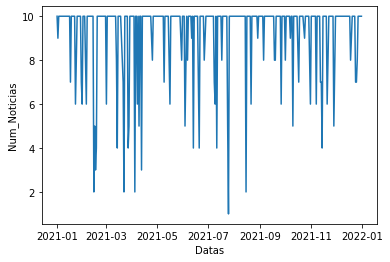

In [197]:
#Visualizando data vs quantidade de notícias
data_df.columns = ['Datas', 'Num_Noticias']
sns.lineplot(x = 'Datas', y = 'Num_Noticias', data = data_df)

In [198]:
# inserindo coluna de mês
data_df['Mes'] = data_df['Datas'].dt.month

# Calculando media de noticias por mês
df_noticia_mes = data_df.groupby('Mes').agg({'Num_Noticias':np.mean})
df_noticia_mes

,Num_Noticias
Mes,
1,9.444444
2,8.888889
3,8.666667
4,9.000000
5,9.642857
6,9.185185
7,8.884615
8,9.535714
9,9.642857


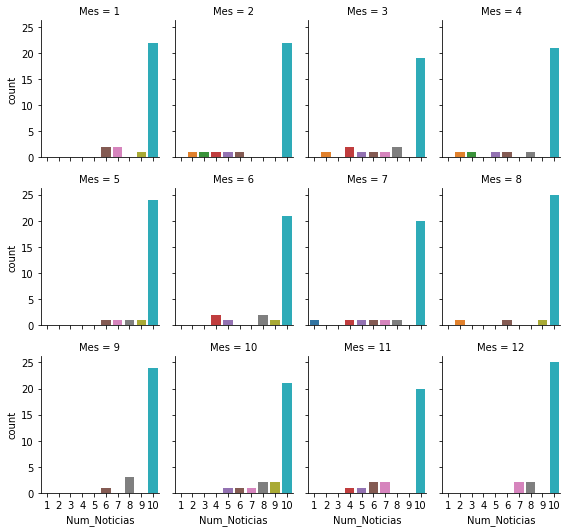

In [199]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
sns.catplot(x="Num_Noticias", col="Mes", col_wrap=4,
                data=data_df,
                kind="count", height=2.5, aspect=.8)

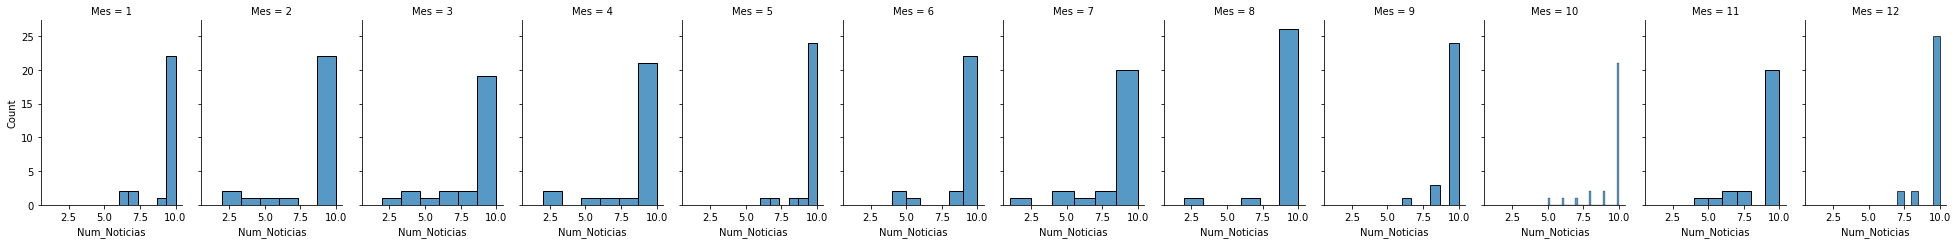

In [200]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
g = sns.FacetGrid(data_df, col="Mes", height=3.5, aspect=.65)
g.map(sns.histplot, "Num_Noticias")

Há poucas ocorrências de baixo numero de noticias por dia, a maior ocorrência da quantidade de noticias por dia é de 10.
Dessa forma, a média de noticias por mês varia de 8.6 á 9.65.

## 3.2 Há poucos dias sem noticias na base de dados

In [201]:
## Gerando uma lista com todos os dias de 2021:
start_date = '01/01/2021'
end_date = '31/12/2021'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]

In [202]:
#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

In [203]:
#Gerando lista com todas as datas sem noticias em 2021
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]
print("Há %s dias sem notícias em 2021!" % len(datas_sem_noticias))

Há 38 dias sem notícias em 2021!


Em apenas 38 dias de 2021 não houve retorno de noticias diárias da Petrobras

## 3.3 Há dias em que o pregão da bolsa não funciona (Finais de Semana)

In [204]:
datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]

In [205]:
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]

In [206]:
print("Há %s dias sem pregão em 2021!" % len(datas_sem_pregao))

Há 118 dias sem pregão em 2021!


# 4.0 Pré-Processamento

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [207]:
df.head()

,title,media,date,desc
0,A construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"Refinaria Abreu e Lima da Petrobras, a RNEST p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,5 Dicas de Tony Robbins para Ficar Rico Invest...,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,Acadêmicos de engenharia Mecânica criam projet...,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,Multinacional dinamarquesa European Energy faz...,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...


In [208]:
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,5 dicas de tony robbins para ficar rico invest...,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,acadêmicos de engenharia mecânica criam projet...,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,multinacional dinamarquesa european energy faz...,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...


## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [209]:
df.iloc[2][0]

'5 dicas de tony robbins para ficar rico investindo'

In [210]:
df.iloc[2][3]

'O QUE LER AGORA... ibovespa-sobe-021-apos-demissao-na-petrobras-prio3-.  Notícias. Ibovespa Sobe +0...'

Essa noticia "5 dicas de tony robbins para ficar rico investindo", por exemplo, não possui relação com a petrobras no título e nem no corpo do artigo ao checar direto na fonte em <https://comoinvestir.thecap.com.br/5-dicas-de-tony-robbins-para-ficar-rico-investindo>. A biblioteca GoogleNews() retornou essa noticia, pois, na pagina HTML há noticias recomendadas ao leitor que possuem a palavra chave "petrobras".

Noticias sem a palavra chave "petrobras" no título serão excluidas do dataset

In [211]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...
...,...,...,...,...
3021,quer trabalhar na petrobras? falta menos de um...,JC Online,2021-12-31,O processo seletivo público que oferece 757 va...
3022,,CNN Brasil,2021-12-31,"Para ele, a solução desta pressão não deve pas..."
3023,,PetroNotícias,2021-12-31,Isso porque a Petrobrás anunciou que registrou...
3024,unigel assina contratos para suprimento das fá...,CPG Click Petroleo e Gas,2021-12-31,No dia 27 de dezembro a Unigel fechou contrato...


In [212]:
df = df[(df['title'] != "")]
df

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
26,petrobras é condenada em arbitragem iniciada p...,Forbes Brasil,2021-04-01,A Petrobras disse que a sentença determinou qu...
27,petrobras fez provisionamento para indenizar iesa,Valor Econômico,2021-04-01,Petrobras fez provisionamento para indenizar I...
28,"petrobras é condenada, nos eua, a indenizar a ...",Money Times,2021-04-01,A Petrobras (PETR3; PETR4) foi condenada por u...
...,...,...,...,...
3018,aumento do preço do gás encanado: justiça inti...,FDR,2021-12-31,"Na última quinta-feira, 30, a Petrobras recebe..."
3019,presidente da petrobras diz que eleições não v...,Jovem Pan,2021-12-31,"Para 2022, Joaquim Silva e Luna entende que a ..."
3020,"petrobras conclui venda de ativos do rn, em me...",Saiba Mais,2021-12-31,Após os trabalhadores aprovarem estado de grev...
3021,quer trabalhar na petrobras? falta menos de um...,JC Online,2021-12-31,O processo seletivo público que oferece 757 va...


1494 noticias não relacionadas ao termo "Petrobras" em seus títulos foram foram excluidas do dataset

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [235]:
df_petro

,Date,Adj Close,Volume,Var%
0,2021-01-04,19.274340,74719700,0.020113
1,2021-01-05,20.027718,95181100,0.039087
2,2021-01-06,20.067719,96562500,0.001997
3,2021-01-07,20.667747,56171300,0.029900
4,2021-01-08,20.747751,67136300,0.003871
...,...,...,...,...
242,2021-12-23,23.237993,28713600,0.006037
243,2021-12-27,23.582502,44227900,0.014825
244,2021-12-28,23.607111,30688100,0.001044
245,2021-12-29,23.410248,35508400,-0.008339


In [237]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

,Date,Adj Close,Volume,Var%,Fechamento
0,2021-01-04,19.274340,74719700,0.020113,1
1,2021-01-05,20.027718,95181100,0.039087,1
2,2021-01-06,20.067719,96562500,0.001997,1
3,2021-01-07,20.667747,56171300,0.029900,1
4,2021-01-08,20.747751,67136300,0.003871,1
...,...,...,...,...,...
242,2021-12-23,23.237993,28713600,0.006037,1
243,2021-12-27,23.582502,44227900,0.014825,1
244,2021-12-28,23.607111,30688100,0.001044,1
245,2021-12-29,23.410248,35508400,-0.008339,0


In [238]:
df_petro.Fechamento.value_counts()

1    131
0    116
Name: Fechamento, dtype: int64

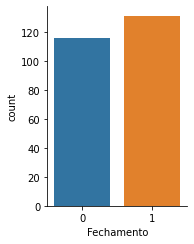

In [247]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Em 2021 houve 131 fechamentos com aumento nos valores de ações da Petrobras e 116 com fechamento em queda.

## 4.5 Concatenar noticias diárias

In [216]:
df_petro.head()

,Date,Adj Close,Volume,Var%
0,2021-01-04,19.274340,74719700,0.020113
1,2021-01-05,20.027718,95181100,0.039087
2,2021-01-06,20.067719,96562500,0.001997
3,2021-01-07,20.667747,56171300,0.029900
4,2021-01-08,20.747751,67136300,0.003871


In [250]:
df.head()

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
26,petrobras é condenada em arbitragem iniciada p...,Forbes Brasil,2021-04-01,A Petrobras disse que a sentença determinou qu...
27,petrobras fez provisionamento para indenizar iesa,Valor Econômico,2021-04-01,Petrobras fez provisionamento para indenizar I...
28,"petrobras é condenada, nos eua, a indenizar a ...",Money Times,2021-04-01,A Petrobras (PETR3; PETR4) foi condenada por u...


In [543]:
lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)

In [544]:
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria

,Date,Noticias
0,2021-01-01,a construção naval brasileira tem chances de ...
1,2021-04-01,petrobras é condenada em arbitragem iniciada ...
2,2021-06-01,xp eleva preço-alvo das ações da petrobras e ...
3,2021-08-01,"abicom diz que petrobras tem preços ""predatór..."
4,2021-09-01,petrobras vive maior surto de covid-19 desde ...
...,...,...
294,2021-12-27,alerj vai à justiça contra a petrobras para b...
295,2021-12-28,distribuidoras de gás de 5 estados entram na ...
296,2021-12-29,petrobras vai recorrer de decisão que suspend...
297,2021-12-30,judicialização coloca mercado de gás em risco...


## 4.6 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [556]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]
    delta = data - data_anterior
    
    # Se houver mais de 1 dia sem pregão:
    
    if delta > timedelta_1dia:
        
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']>= data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]
        
        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao.head()

,Date,Noticias
0,2021-01-11,silva e luna 'militariza' cúpula da petrobra...
1,2021-01-18,mais de 100 vagas de emprego no setor de pet...
2,2021-01-26,revendedores de gás prometem greve em 1º de ...
3,2021-02-01,petrobras anuncia descoberta no pré-sal de c...
4,2021-02-08,"apoiadas por sindicatos, famílias ocupam ter..."


## 4.7 Atribui as noticias concatenadas de dias sem pregões aos dias com pregão no dataframe de noticias:

In [558]:
# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:

for i in df_news_sem_pregao.Date.unique():
    noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==i)].iloc[0][1]
    

    #Checa se existem noticias referente ao dia com pregão:
    if len(df_news_diaria[(df_news_diaria['Date']==i)]) > 0:
        
        #Atualiza os registros
        df_news_diaria[(df_news_diaria['Date']==i)].iloc[0][1]
        
    else:
        #Insere o novo registro
        df_news_diaria = df_news_diaria.append(df_news_sem_pregao[(df_news_sem_pregao['Date']==i)], ignore_index = True)
        
df_news_diaria.head()

,Date,Noticias
0,2021-01-01,a construção naval brasileira tem chances de ...
1,2021-04-01,petrobras é condenada em arbitragem iniciada ...
2,2021-06-01,xp eleva preço-alvo das ações da petrobras e ...
3,2021-08-01,"abicom diz que petrobras tem preços ""predatór..."
4,2021-09-01,petrobras vive maior surto de covid-19 desde ...


## 4.8 Mescla o dataframe noticias finais e ações

In [639]:
df_final = pd.merge(left = df_petro, right = df_news_diaria, how = 'left', on = 'Date')
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2021-01-04,19.274340,74719700,0.020113,1,tcu avalia barrar venda de refinaria da petro...
1,2021-01-05,20.027718,95181100,0.039087,1,petrobras (petr4) inicia contratação de nona ...
2,2021-01-06,20.067719,96562500,0.001997,1,valor de venda de refinaria da petrobras é qu...
3,2021-01-07,20.667747,56171300,0.029900,1,petrobras confirma venda da fatia na br distr...
4,2021-01-08,20.747751,67136300,0.003871,1,NaN
...,...,...,...,...,...,...
242,2021-12-23,23.237993,28713600,0.006037,1,programa da petrobras que reforça capital de ...
243,2021-12-27,23.582502,44227900,0.014825,1,alerj vai à justiça contra a petrobras para b...
244,2021-12-28,23.607111,30688100,0.001044,1,distribuidoras de gás de 5 estados entram na ...
245,2021-12-29,23.410248,35508400,-0.008339,0,petrobras vai recorrer de decisão que suspend...


In [640]:
df_final.isnull().sum()

Date           0
Adj Close      0
Volume         0
Var%           0
Fechamento     0
Noticias      28
dtype: int64

In [649]:
df_final[df_final["Date"]=='2021-01-08T00:00:00.000000000']

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
4,2021-01-08,20.747751,67136300,0.003871,1,NaN


In [648]:
df_petro[df_petro["Date"]=='2021-08-01T00:00:00.000000000']

,Date,Adj Close,Volume,Var%,Fechamento


In [651]:
df_petro[df_petro["Date"]=='2021-01-08T00:00:00.000000000']

,Date,Adj Close,Volume,Var%,Fechamento
4,2021-01-08,20.747751,67136300,0.003871,1


In [646]:
df_news_diaria[df_news_diaria["Date"]=='2021-08-01T00:00:00.000000000']

,Date,Noticias
3,2021-08-01,"abicom diz que petrobras tem preços ""predatór..."


In [632]:
df_news_diaria.Date.unique()

array(['2021-01-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-09-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-12-01T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-22T00:00:00.000000000',
       '2021-01-25T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-28T00:00:00.000000000', '2021-01-29T00:00:00.000000000',
       '2021-02-02T00:00:00.000000000', '2021-03-02T00:00:00.000000000',
       '2021-05-02T00:00:00.000000000', '2021-06-02T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2021-08-02T00:00:00.000000000',
       '2021-09-02T00:00:00.000000000', '2021-10-02T00:00:00.000000000',
       '2021-11-02T00:00:00.000000000', '2021-12-02

In [633]:
df_petro.Date.unique()

array(['2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-27T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-01-29T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-02-02T00:00:00.000000000', '2021-02-03T00:00:00.000000000',
       '2021-02-04T00:00:00.000000000', '2021-02-05T00:00:00.000000000',
       '2021-02-08T00:00:00.000000000', '2021-02-09T00:00:00.000000000',
       '2021-02-10T00:00:00.000000000', '2021-02-11

In [635]:
df_petro['Date'] = df_petro['Date'].apply(lambda x: pd.to_datetime(str(x) ))
df_news_diaria['Date'] = df_news_diaria['Date'].apply(lambda x: pd.to_datetime(str(x) ))

In [636]:
teste = df_petro.Date.unique()[4]
teste

numpy.datetime64('2021-01-08T00:00:00.000000000')

In [637]:
teste3 = df_petro.Date.unique()[4]
teste3

numpy.datetime64('2021-01-08T00:00:00.000000000')

In [638]:
teste == teste3

True

In [629]:
ts = pd.to_datetime(str(teste)) 
ts

Timestamp('2021-01-08 00:00:00')

## 4.8 Concatenando dataframe de pregões e noticias.

As seguintes regras serão aplicadas:
- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset deverá conter apenas as datas em que ocorreu o pregão

# 5.0 Inputação de polaridade de novos termos ao dicionário SentilexPT

Será realizado o levantamento das palavras mais frequentes em notícias para inputação de polaridade no dicionário SentilexPT caso não existam ainda.

## 5.1 Bag of Words

In [ ]:
# 6.0